In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1T0-Fqft1Uwa5zOWrV59IpjyRVLtFMkbT"
output_file = "Yoga_Asanas_Classification_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1T0-Fqft1Uwa5zOWrV59IpjyRVLtFMkbT
From (redirected): https://drive.google.com/uc?id=1T0-Fqft1Uwa5zOWrV59IpjyRVLtFMkbT&confirm=t&uuid=cbb017ed-d2cf-4c9c-9284-f41e9b439d03
To: /content/Yoga_Asanas_Classification_Datasets.zip
100%|██████████| 5.53G/5.53G [01:31<00:00, 60.5MB/s]


'Yoga_Asanas_Classification_Datasets.zip'

In [3]:
import zipfile
z = zipfile.ZipFile('/content/Yoga_Asanas_Classification_Datasets.zip')
z.extractall()

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.2 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO

# Load a YOLOv11 classification model
model = YOLO('yolov8n-cls.pt')  # Replace with 'yolo11m-cls.pt' or similar for better accuracy

# Train the classification model
model.train(
    data='Yoga_Asanas_Classification_Datasets',  # Make sure this is for classification
    epochs=10,
    imgsz=224,           # Classification models usually use smaller image sizes like 224 or 256
    batch=8,
    name='Yoga_Asanas_Classification_Datasets_yolo8n',
    save=True,
    save_period=-1,      # Only save the best
    patience=20,
    val=True             # Enable validation to track best model
)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Yoga_Asanas_Classification_Datasets, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Yoga_Asanas_Classification_Datasets_yolo8n2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b95b1c09730>
curves: []
curves_results: []
fitness: 0.9078014194965363
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.8368794322013855, 'metrics/accuracy_top5': 0.978723406791687, 'fitness': 0.9078014194965363}
save_dir: PosixPath('/content/runs/classify/Yoga_Asanas_Classification_Datasets_yolo8n2')
speed: {'preprocess': 0.17401369503346384, 'inference': 2.4710022056725967, 'loss': 0.0008633758799523422, 'postprocess': 0.41166927659228125}
task: 'classify'
top1: 0.8368794322013855
top5: 0.978723406791687


image 1/1 /content/Yoga_Asanas_Classification_Datasets/test/Virabhadrasana Three/File67.jpeg: 224x224 Virabhadrasana Three 0.58, Ardha Chandrasana 0.34, Phalakasana 0.04, Marjaryasana 0.01, Bitilasana 0.01, 3.8ms
Speed: 2.4ms preprocess, 3.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/Yoga_Asanas_Classification_Datasets/test/Parsvottanasana/File17.png: 224x224 Adho Mukha Svanasana 0.32, Parsvottanasana 0.29, Uttanasana 0.09, Dhanurasana 0.07, Navasana 0.03, 2.3ms
Speed: 3.4ms preprocess, 2.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/Yoga_Asanas_Classification_Datasets/test/Bakasana/File69.png: 224x224 Bakasana 0.74, Uttanasana 0.20, Marjaryasana 0.02, Adho Mukha Svanasana 0.01, Bitilasana 0.01, 2.3ms
Speed: 3.2ms preprocess, 2.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/Yoga_Asanas_Classification_Datasets/test/Ardha Pincha Mayurasana/File15.png: 224x224 

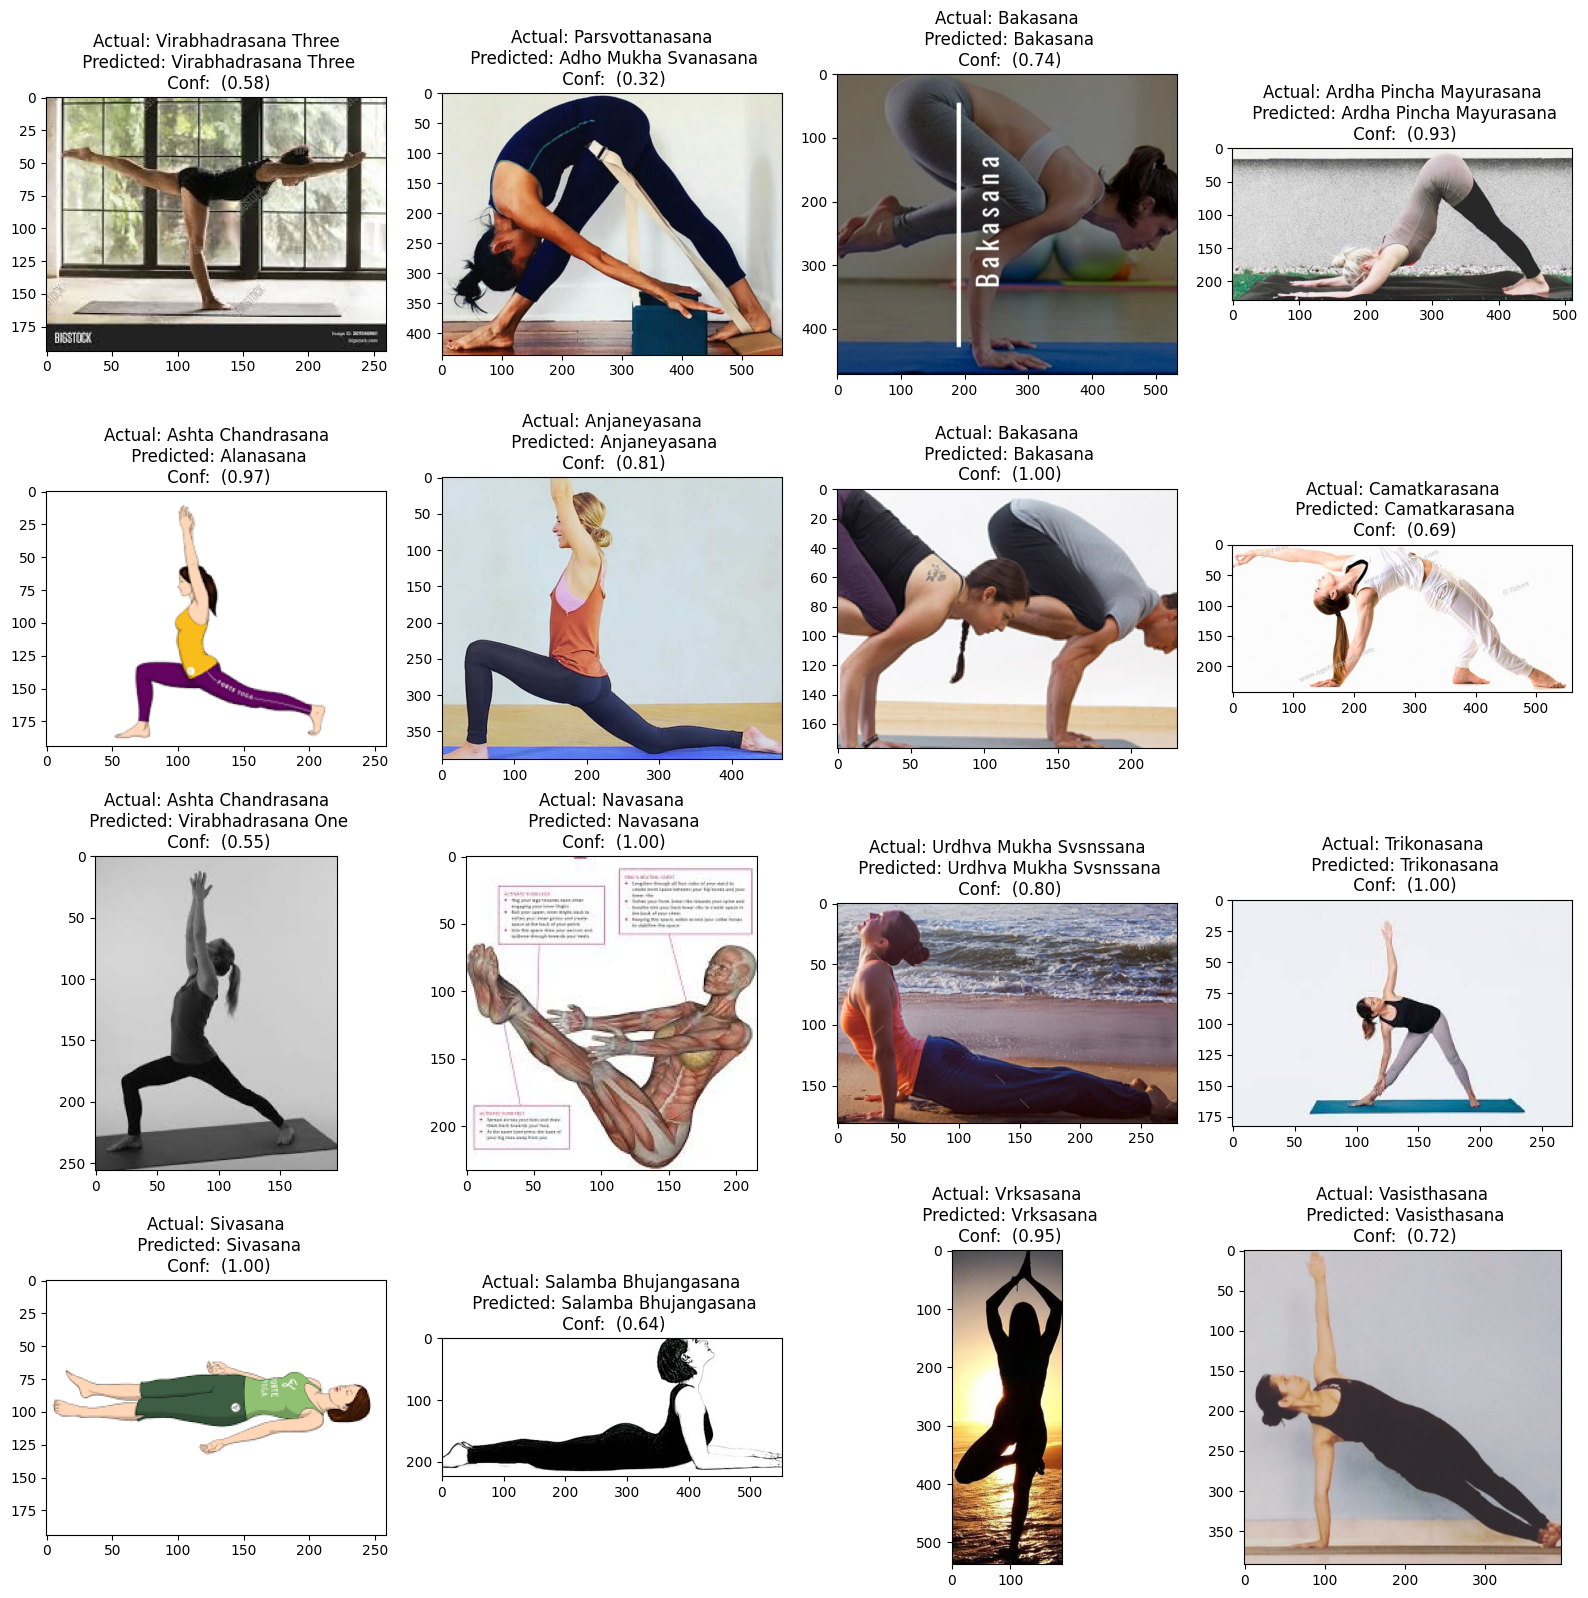

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained classification model
model = YOLO('runs/classify/Yoga_Asanas_Classification_Datasets_yolo8n2/weights/best.pt')

# Test images directory
test_images_folders = 'Yoga_Asanas_Classification_Datasets/test'

# Get list of image files
image_folders = os.listdir(test_images_folders)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_folder = random.choice(image_folders)
    img_files = os.listdir(os.path.join(test_images_folders,img_folder))
    img_path = os.path.join(test_images_folders, img_folder, random.choice(img_files))
    image = cv2.imread(img_path)

    # Perform classification inference
    results = model(img_path)  # returns a list with one result
    result = results[0]

    # Get predicted class name
    class_id = int(result.probs.top1)
    class_name = model.names[class_id]
    confidence = result.probs.top1conf.item()

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image with class name and confidence
    ax[idx].imshow(image_rgb)
    ax[idx].set_title(f"Actual: {img_folder}\n Predicted: {class_name}\n Conf:  ({confidence:.2f})", fontsize=12)
    # ax[idx].axis('off')

plt.tight_layout()
plt.show()
